PRACTICE Nº1:

Prediction: Linear regression with one variable.
- predict how many times an aticle will be shared

package imports: numpy, panda, seaborn matplotlib

In [50]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

file reading and dataset load

In [51]:
data = pd.read_csv("./articulos_ml.csv")
data.shape

(161, 8)

rows read of file

In [52]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


now, process data about basic stadistics according to input data

In [53]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


graphic general view according to input data

C:\Users\HADSONPAR\AppData\Local\Temp\ipykernel_13204\3823457019.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title','url', 'Elapsed days'],1).hist()


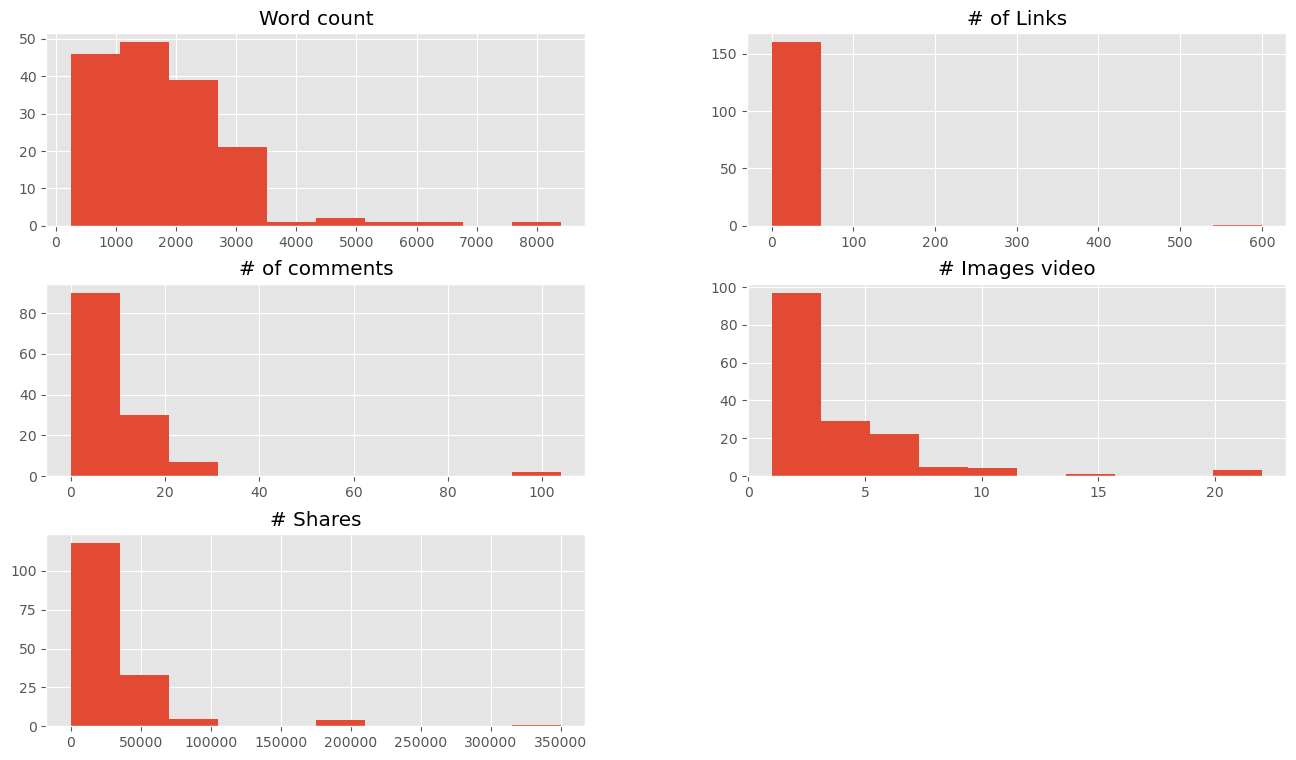

In [54]:

data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

data filter an total 3500 words and painting the points color orange and blue. implement cartesian X=80000 total and Y=3500

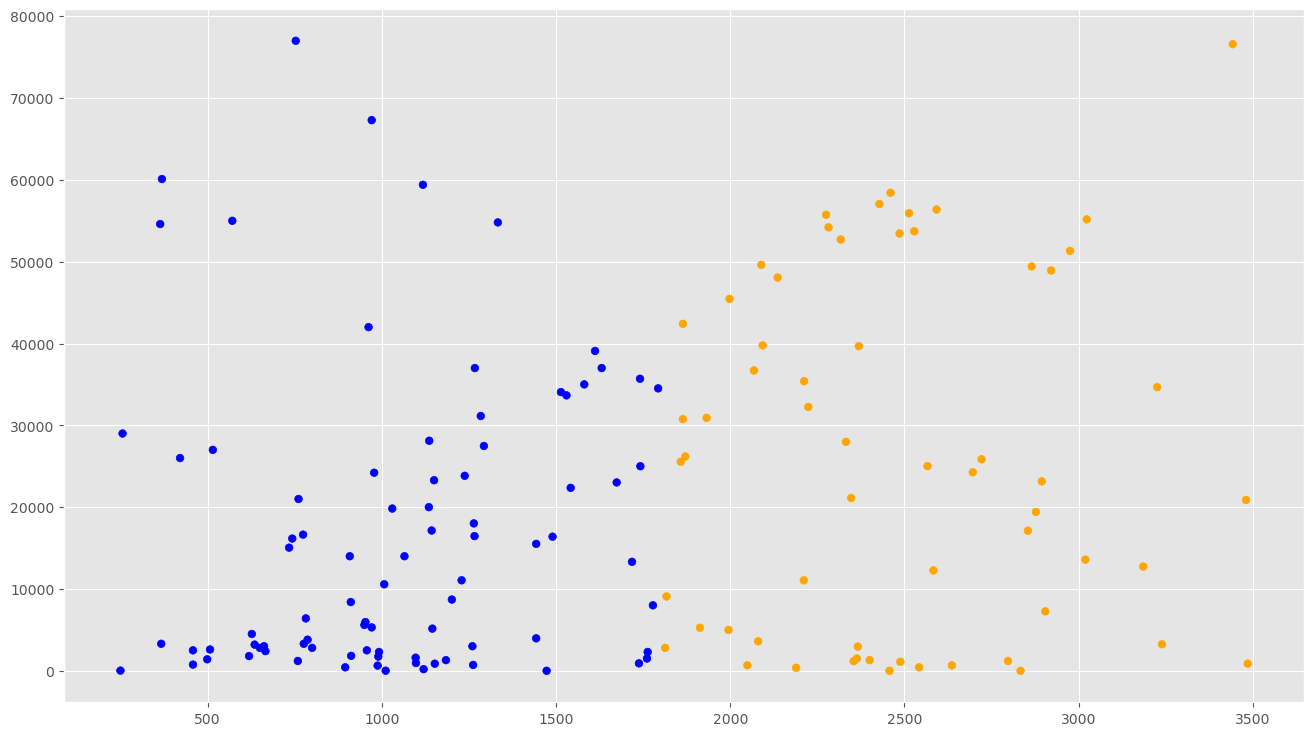

In [55]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
# paint in colors the points below and above the average of Number of Words
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

applying linear regression using code pyhon and sk-learn library

In [56]:
# variable asign, input X for training and the labels Y.
dataX =filtered_data[['Word count']]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# object creation for lineal regression
regr = linear_model.LinearRegression()
 
# our training model
regr.fit(X_train, y_train)
 
# Now we make predictions on a linea (2D)
y_pred = regr.predict(X_train)
 
# the coefficients obtained are of the tangent type.
print('Coefficients: \n', regr.coef_)

# It is value intersect the eje Y (where x=0)
print('Independent term: \n', regr.intercept_)
# Error: Mean Square
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# varianz score. the best score is 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


implementing to visualize the linear line:

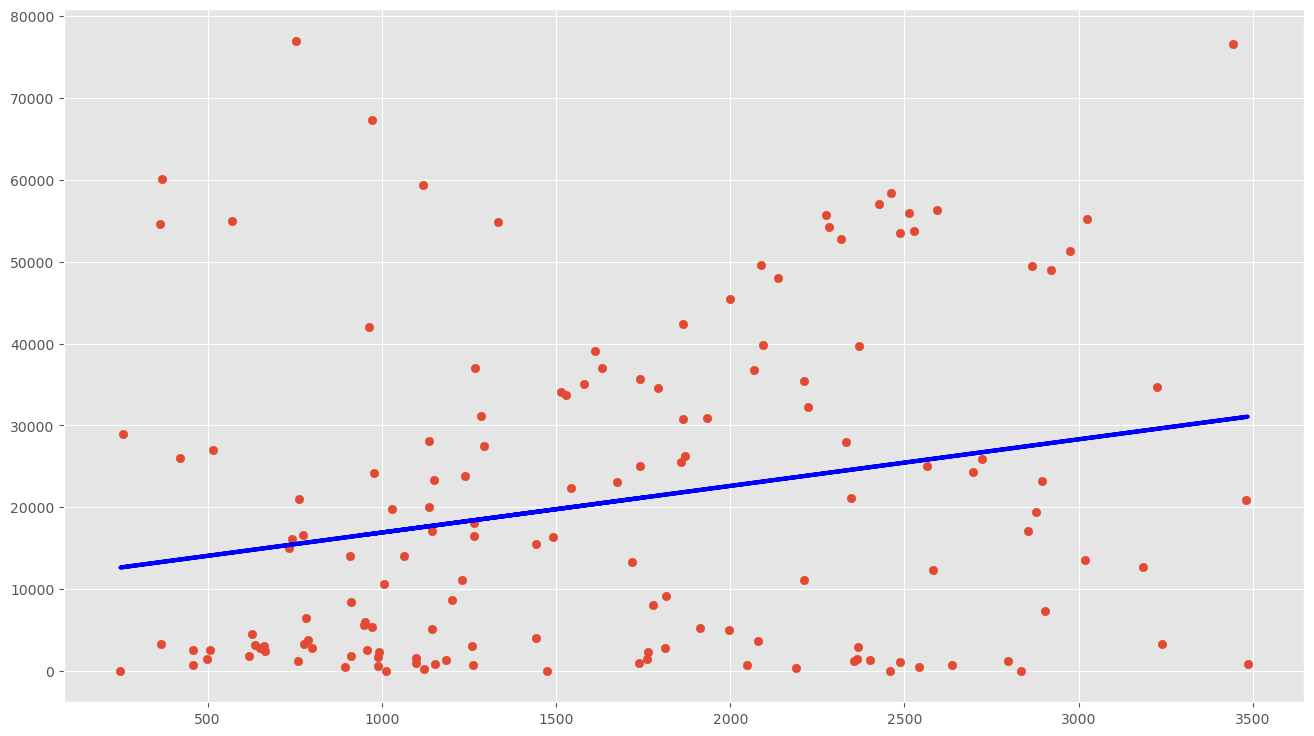

In [57]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='blue', linewidth=3)
plt.show()

prediction: count "shares" when an article with 3000 words is published

In [58]:
y_Dosmil = regr.predict([[3000]])
print(int(y_Dosmil))

28293
